In [1]:
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats.stats import pearsonr

In [2]:
reference_volt_curves= pd.read_pickle("../data/reference/reference_volt_curves.pkl")  

In [3]:
df= pd.read_pickle("../data/processed/with_stat_anomalies.pkl")  

In [4]:
df

index  \
spotName   TimeStamp                     
60000_0_00 2019-09-17 17:56:02   75938   
           2019-09-17 17:56:07   75948   
           2019-09-17 18:05:02   75984   
           2019-09-17 18:42:46   76041   
           2019-09-17 18:59:36   76063   
...                                ...   
60185_0_00 2020-05-06 14:06:47  221817   
           2020-05-06 14:18:28  221856   
           2020-05-27 09:15:45  222009   
           2020-05-27 09:27:57  222086   
           2020-05-27 10:18:20  222239   

                                                                     VoltageCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 17:56:02  [139, 752, 1329, 1687, 1897, 2037, 2098, 2107,...   
           2019-09-17 17:56:07  [134, 755, 1309, 1661, 1888, 2056, 2140, 2140,...   
           2019-09-17 18:05:02  [134, 758, 1298, 1652, 1897, 2065, 2124, 2124,...   
           2019-09-17 18:42:46  [138, 767, 1328, 1682, 1906, 2061, 2139, 2148,...   
           2019-09-17 18:59:36  [130, 745, 1300, 1646, 1854, 2028, 2114, 2114,...   
...                                                                           ...   
60185_0_00 2020-05-06 14:06:47  [145, 809, 1349, 1648, 1816, 1860, 1808, 1743,...   
           2020-05-06 14:18:28  [145, 816, 1378, 1684, 1794, 1860, 1838, 1736,...   
           2020-05-27 09:15:45  [153, 813, 1356, 1657, 1825, 1869, 1818, 1759,...   
           2020-05-27 09:27:57  [149, 813, 1377, 1662, 1798, 1820, 1820, 1755,...   
           2020-05-27 10:18:20  [148, 807, 1356, 1667, 1845, 1890, 1815, 1756,...   

                                                                     CurrentCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 17:56:02  [302, 1999, 3574, 4694, 5512, 6148, 6542, 6815...   
           2019-09-17 17:56:07  [303, 2002, 3549, 4702, 5551, 6340, 6886, 7189...   
           2019-09-17 18:05:02  [305, 2017, 3607, 4738, 5656, 6389, 6848, 7154...   
           2019-09-17 18:42:46  [333, 2033, 3641, 4795, 5614, 6312, 6767, 7040...   
           2019-09-17 18:59:36  [302, 1996, 3569, 4719, 5536, 6262, 6837, 7109...   
...                                                                           ...   
60185_0_00 2020-05-06 14:06:47  [354, 2200, 4081, 5500, 6565, 7239, 7594, 7842...   
           2020-05-06 14:18:28  [337, 2262, 4288, 5773, 6786, 7563, 8069, 8205...   
           2020-05-27 09:15:45  [337, 2193, 4116, 5499, 6512, 7220, 7490, 7726...   
           2020-05-27 09:27:57  [333, 2265, 4197, 5630, 6562, 7162, 7662, 7928...   
           2020-05-27 10:18:20  [317, 2188, 4059, 5471, 6565, 7200, 7518, 7730...   

                                voltage_drop  voltage_spike  \
spotName   TimeStamp                                          
60000_0_00 2019-09-17 17:56:02         False          False   
           2019-09-17 17:56:07         False          False   
           2019-09-17 18:05:02         False          False   
           2019-09-17 18:42:46         False          False   
           2019-09-17 18:59:36         False          False   
...                                      ...            ...   
60185_0_00 2020-05-06 14:06:47         False          False   
           2020-05-06 14:18:28         False          False   
           2020-05-27 09:15:45         False          False   
           2020-05-27 09:27:57         False          False   
           2020-05-27 10:18:20         False          False   

                                n_voltage_outliers  %volt_anomalies  \
spotName   TimeStamp                                                  
60000_0_00 2019-09-17 17:56:02                  27                6   
           2019-09-17 17:56:07                  29                7   
           2019-09-17 18:05:02                   9                2   
           2019-09-17 18:42:46                  30                7   
           2019-09-17 18:59:

In [5]:
curva=list(df.loc[('60185_0_00', '2020-05-27 09:15:45'), :]["VoltageCurve"])
curva=curva[0]

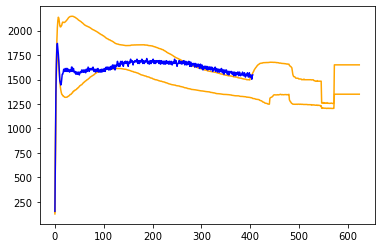

In [6]:
plt.plot(reference_volt_curves[["upper_limit","lower_limit"]],"orange")
plot(curva,"blue")

#### Correlazione tra il numero di outlier in current e voltage

Text(0, 0.5, 'n_voltage_outliers')

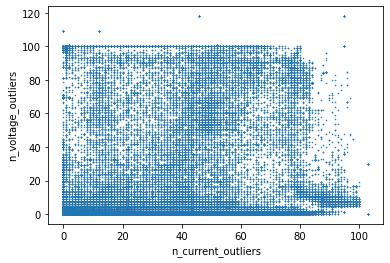

In [9]:
plt.scatter(df["%volt_anomalies"],df["%current_anomalies"],s=0.3)
plt.xlabel("n_current_outliers")
plt.ylabel("n_voltage_outliers")

In [12]:
pearsonr(df["%volt_anomalies"],df["%current_anomalies"])

(0.49545113608682534, 0.0)

In [16]:
linregress(df["%volt_anomalies"],df["%current_anomalies"])

LinregressResult(slope=0.5136995781619378, intercept=0.14296809160482304, rvalue=0.49545113608682495, pvalue=0.0, stderr=0.0022401220938321528, intercept_stderr=0.08723724179293664)

Sembrerebbe esserci una moderata correlazione tra le due dimensioni (0.5 circa)

Considerando però che il numero di outlier è già un risultato approssimativo non possiamo affermare con certezze che a numerose anomalie nei valori di tensione corrispondano numerose anomalie nella corrente (o viceversa).